In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa 
import soundfile as sf
import numpy as np
import os, glob

import librosa.display
 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt

In [ ]:
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

# to play the audio files
#from IPython.display import Audio

In [ ]:
emotion_labels = {
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#case 1
#focused_emotion_labels = ['happy', 'sad']
#case 2
focused_emotion_labels = ['happy', 'sad', 'angry']
#case 3
#focused_emotion_labels = ['neutral', 'happy', 'sad', 'angry']
#case 4
#focused_emotion_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [ ]:
def audio_features(file_title, mfcc):
    with sf.SoundFile(file_title) as audio_recording:
        audio = audio_recording.read(dtype="float32")
        sample_rate = audio_recording.samplerate
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        return result

In [ ]:
#path = '/content/drive/MyDrive/Machine_Learning/Audio_Speech_Actors_01-24/'
path = '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data'

In [ ]:
def loading_audio_data():
    x = []
    y = []
    for file in glob.glob(path+"//Actor_*//*.wav"):
        file_path=os.path.basename(file)
        emotion = emotion_labels[file_path.split("-")[2]]
        if emotion not in focused_emotion_labels:
             continue
        feature = audio_features(file, mfcc=True)  #removed chroma and mel
        x.append(feature)
        y.append(emotion)

    final_dataset = train_test_split(np.array(x), y, test_size=0.2)
    return final_dataset

In [ ]:
X_train, X_test, y_train, y_test = loading_audio_data()

In [ ]:
# Get the number of features extracted
print('Features extracted:', {X_train.shape})

Features extracted: {(460, 40)}


In [ ]:
X_train

array([[-4.72073608e+02,  1.77639179e+01, -3.48452110e+01, ...,
        -1.29887712e+00,  1.65851724e+00,  1.04530525e+00],
       [-6.86165161e+02,  6.86602173e+01,  9.45426750e+00, ...,
         3.74710202e-01,  1.57189083e+00,  1.05813079e-01],
       [-5.00000763e+02,  5.07351036e+01, -1.44651356e+01, ...,
         1.95198262e+00,  2.61928868e+00,  2.00372577e+00],
       ...,
       [-6.91339783e+02,  6.37192192e+01,  2.62865186e+00, ...,
        -8.86689842e-01, -9.64223742e-01, -8.48464251e-01],
       [-6.18056091e+02,  4.20637932e+01, -1.29646482e+01, ...,
         1.71212041e+00,  3.25850987e+00,  2.08075905e+00],
       [-4.98104736e+02,  3.76056557e+01, -1.61294365e+01, ...,
         4.37982988e+00, -1.41200423e+00, -2.53162146e+00]])

In [ ]:
 
model = MLPClassifier(hidden_layer_sizes=(100,), learning_rate='adaptive', max_iter=400) 

In [ ]:
model.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', max_iter=400)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy of the Recognizer is: {:.1f}%".format(accuracy*100))

Accuracy of the Recognizer is: 72.4%


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.87      0.56      0.68        36
       happy       0.61      0.78      0.68        36
         sad       0.77      0.82      0.79        44

    accuracy                           0.72       116
   macro avg       0.75      0.72      0.72       116
weighted avg       0.75      0.72      0.72       116



In [ ]:
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[20 10  6]
 [ 3 28  5]
 [ 0  8 36]]


In [ ]:
# fig, ax = plt.subplots(figsize=(7.5, 7.5))
# ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(matrix.shape[0]):
#     for j in range(matrix.shape[1]):
#         ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()

Text(30.5, 0.5, 'Ground Truth')

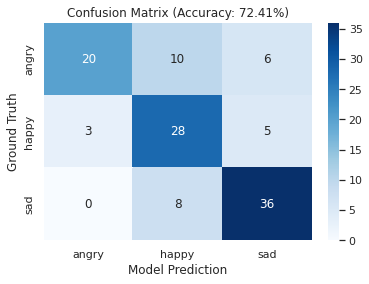

In [ ]:
plt.title("Confusion Matrix (Accuracy: %s%%)" % round(accuracy*100,2))
emotion_labels = ['angry', 'happy', 'sad']
df_cm = pd.DataFrame(matrix, emotion_labels, emotion_labels)
sns.heatmap(df_cm, cmap='Blues', annot=True)
plt.xlabel("Model Prediction")
plt.ylabel("Ground Truth")
